In [1]:
import numpy as np
from numpy.random import default_rng
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
# Let's start with a home made RNG
# It will be of the linear congruential generator variety 

In [3]:
def rng(size = 10, seed = 1, m = 2**32, a = 1664525, c = 1013904223):
    rng_current = seed
    uni_rns = np.zeros((size))
    for i in range(size):
        rng_current = (a * rng_current + c) % m
        uni_rns[i] = rng_current/m
    return uni_rns

In [4]:
# lets get us a 10000 samples from Uniform(0,1). The seed is 42
u = rng(10000, 42)

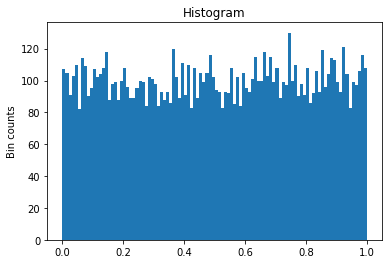

In [5]:
fig, ax = plt.subplots(1, 1)
ax.hist(u, bins=100)
ax.set_ylabel('Bin counts')
ax.set_title("Histogram");

In [6]:
# Lets use the Python built in generator 

In [7]:
bi_rng = default_rng(42)
w = bi_rng.random(10000)

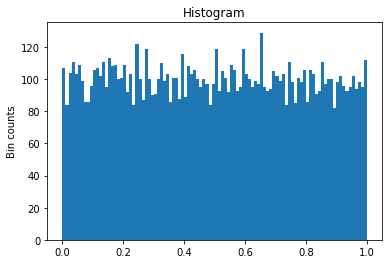

In [8]:
fig1, ax1 = plt.subplots(1, 1)
ax1.hist(w, bins=100)
ax1.set_ylabel('Bin counts')
ax1.set_title("Histogram");

However, JAX cannot use a global PRNG state!

In [9]:
np.random.seed(0)

def foo(): return np.random.uniform()
def bar(): return np.random.uniform()

def fooba(): return 3*foo() + 2 * bar()

print(fooba())

3.0768192445268134


To make the result here reproducible we have to enforce a specific order of the execution (as numpy does). But JAX needs to paralelize foo() and bar().

To avoid this issue, JAX does not use a global state. Instead, random functions explicitly consume the state, which is referred to as a key (random key is the same thing as random seed).

In [10]:
!pip install --upgrade -q "jax[cuda]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html

In [11]:
from jax import random

key = random.PRNGKey(42)

print(key)

[ 0 42]


In [12]:
print(random.normal(key))
print(random.normal(key))

-0.18471177
-0.18471177


In JAX, in order to generate different and independent samples, you must split() the key yourself whenever you want to call a random function. split() is a deterministic function that converts one key into several independent (in the pseudorandomness sense) keys.

In [13]:
key1, key2 = random.split(key)

In [14]:
print(f"Key 1: {key1}; Key 2: {key2}")

Key 1: [2465931498 3679230171]; Key 2: [255383827 267815257]


Final Note: NumPy provides a sequential equivalent guarantee, meaning that sampling N numbers in a row individually or sampling a vector of N numbers results in the same pseudo-random sequences. JAX does not provide such a sequential equivalence guarantee.